#### Each problem is worth 20 points.

### Problem 1
You will use the diabetic data for this problem. The outcome variable, which has $1$s and $0$s, is the dependent variable, and the rest of the variables are independent variables. Train a logistic regression model with the outcome as a dependent variable and the rest as independent variables. Report the model's summary, confusion matrix of the model, and the model accuracy. Note that predictions from the logistic regression model are probabilities. You can use the round function to turn anything less or equal to $0.5$ to be $0$ and anything more than $0.5$ to be $1$ so that you can compare the prediction and the actual values.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
db = pd.read_csv('diabetes-1.csv', header = None)
db.head(5)

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
db.rename(columns={0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin',
                  5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age', 8: 'Outcome'}, inplace=True)

In [4]:
db = db.drop(db.index[0])
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [5]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
db.dtypes

Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

In [7]:
db['Pregnancies'] = pd.to_numeric(db['Pregnancies'],errors='coerce')
db['Glucose'] = pd.to_numeric(db['Glucose'],errors='coerce')
db['BloodPressure'] = pd.to_numeric(db['BloodPressure'],errors='coerce')
db['SkinThickness'] = pd.to_numeric(db['SkinThickness'],errors='coerce')
db['Insulin'] = pd.to_numeric(db['Insulin'],errors='coerce')
db['BMI'] = pd.to_numeric(db['BMI'],errors='coerce')
db['DiabetesPedigreeFunction'] = pd.to_numeric(db['DiabetesPedigreeFunction'],errors='coerce')
db['Age'] = pd.to_numeric(db['Age'],errors='coerce')
db['Outcome'] = pd.to_numeric(db['Outcome'],errors='coerce')

In [8]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
y = db['Outcome']
x = db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x = sm.add_constant(x)

In [10]:
model = sm.OLS(y,x)
result = model.fit()

In [11]:
ypred = result.predict(sm.add_constant(x))
ypred

1      0.651757
2      0.005733
3      0.736424
4     -0.021923
5      0.833189
         ...   
764    0.373724
765    0.358722
766    0.242566
767    0.345976
768    0.068132
Length: 768, dtype: float64

In [12]:
round(ypred)

1      1.0
2      0.0
3      1.0
4     -0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    0.0
768    0.0
Length: 768, dtype: float64

In [13]:
ypred.loc[ypred <= 0.5] = 0
ypred.loc[ypred >0.5] = 1
ypred

1      1.0
2      0.0
3      1.0
4      0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    0.0
768    0.0
Length: 768, dtype: float64

In [14]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db.Outcome
xtrain, xtest, ytrain, ytest = train_test_split(xx, y)

In [17]:
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()

In [18]:
logit = sm.Logit(y, sm.add_constant(x), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2718
Time:                        16:37:54   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [19]:
confusion_matrix(y, ypred)

array([[447,  53],
       [113, 155]])

In [20]:
(446+154) / (446+154+114+54)

0.78125

### Problem 2 
Tune the model in problem 1. For this, you will have to remove one independent variable at a time from the original model, create a new model with the remaining variables and stop when all the variables have $p$-value $<0.10$. Report the final model's summary, confusion matrix of the model, and the model accuracy. 

In [21]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db.Outcome
xtrain, xtest, ytrain, ytest = train_test_split(xx, y)
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
logit = sm.Logit(y, sm.add_constant(xx), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.470998
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2718
Time:                        16:37:58   Log-Likelihood:                -361.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.500e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4051      0.717    -11.727      0.000      -9.810      -7.000
Pregnancies                  0.1232      0.032      3.841      0.000       0.060       0.186
Glucose                      0.0351      0.004      9.587      0.000       0.028       0.042
BloodPressure               -0.0132      0.005     -2.564      0.010      -0.023      -0.003
Insulin                     -0.0012      0.001     -1.421      0.155      -0.003       0.000
BMI                          0.0901      0.014      6.229      0.000       0.062       0.118
DiabetesPedigreeFunction     0.9476      0.298      3.180      0.001       0.364       1.532
Age                          0.0148      0.009      1.592      0.111      -0.003       0.033
============================================================================================
"""

In [23]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db.Outcome
xtrain, xtest, ytrain, ytest = train_test_split(xx, y)
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
logit = sm.Logit(y, sm.add_constant(xx), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2698
Time:                        16:38:04   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

In [24]:
confusion_matrix(y, ypred)

array([[447,  53],
       [113, 155]])

In [25]:
(446+154) / (446+154+114+54)

0.78125

### Problem 3
Filter the diabetes data with only the columns you found in the final model of problem 2 and the outcome column. Now split the data to testing and training following (a)70%, 30%, (b) 75%, 25%, and (c) 80%, 20%  rule. Make sure to add a random state in each training and testing split so that the testing and training data remain the same in each run. Use training data to train 3 logistic regression models. Report the summary of all three models.

In [26]:
db = db.drop('SkinThickness', 1)

In [27]:
db = db.drop('Insulin', 1)

In [28]:
y = db['Outcome']
x = db[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()

a)

In [37]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, test_size = 0.3, random_state = 1)
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
logit = sm.Logit(y, sm.add_constant(xx), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2698
Time:                        16:46:11   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

b)

In [38]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, test_size = 0.25, random_state = 1)
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
logit = sm.Logit(y, sm.add_constant(xx), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2698
Time:                        16:46:16   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

c)

In [39]:
xx = db[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
xx = sm.add_constant(xx)
y = db['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, test_size = 0.2, random_state = 1)
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
logit = sm.Logit(y, sm.add_constant(xx), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2698
Time:                        16:46:19   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

### Problem 4
Find colored confusion matrices for each model in problem 3 for training and testing data. Report their corresponding accuracies. Which model do you pick as a winner and why? ( Need 6 matrices, 2 for each model)

a)

In [32]:
ytrainpred = modelxx.predict(xtrain)
round(ytrainpred)
ytrainpred.loc[ytrainpred <= 0.5] = 0
ytrainpred.loc[ytrainpred >0.5] = 1
ytrainpred

680    0.0
135    0.0
251    0.0
471    0.0
669    0.0
      ... 
407    0.0
391    0.0
144    0.0
242    0.0
624    0.0
Length: 614, dtype: float64

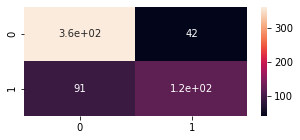

In [36]:
matrix1 = confusion_matrix(ytrain, ytrainpred)
plt.figure(figsize=(5,2))
heatmap = sns.heatmap(matrix1, annot=True)

In [40]:
ytestpred = modelxx.predict(xtest)
round(ytestpred)
ytestpred.loc[ytestpred <= 0.5] = 0
ytestpred.loc[ytestpred >0.5] = 1
ytestpred

286    0.0
102    0.0
582    0.0
353    0.0
727    0.0
      ... 
564    0.0
319    0.0
155    1.0
685    0.0
644    0.0
Length: 154, dtype: float64

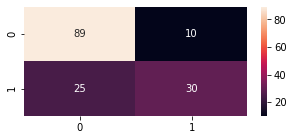

In [41]:
matrix1 = confusion_matrix(ytest, ytestpred)
plt.figure(figsize=(5,2))
heatmap = sns.heatmap(matrix1, annot=True)

### Problem 5
Plot the AUC ROC ( Area Under the Curve, Receiver Operating Characteristics) curve for your best model with appropriate title and labels. Explain what the curve is telling you about the model.

In [42]:
metrics.roc_auc_score(ytrain, result.predict(xtrain))

0.8375071710395373

Text(0.5, 0, 'False Positive Rate')

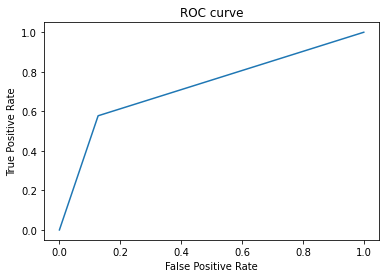

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(ytrain, result.predict(xtrain).round())
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")